In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Weather Data

In [3]:
nyc_weather=pd.read_csv('../data/nyc_weather.csv')

In [4]:
nyc_weather

,Year,DY,MAX,MIN,AVG,DEP,HDD,CDD,WTR,SNW,...,MIN.1,PSBL,S-S,WX,SPD.2,DR,Rel Hum %_Start,Rel Hum % _2 hrs,Rel Hum %_4 hrs,Avg_Hum%
0,2015,1,65,54,60,8,5,0,0.00,0,...,M,M,5,23,240,NaN,64,65,60,63
1,2016,6,59,45,52,1,13,0,0.00,0,...,M,M,1,26,20,NaN,45,39,39,41
2,2017,5,61,51,56,5,9,0,0.02,0,...,M,M,10,1,17,100.0,81,90,93,88
3,2018,4,55,43,49,-2,16,0,0.00,0,...,M,M,0,M,M,NaN,46,40,34,40
4,2019,3,54,42,48,-4,17,0,0.00,0,...,M,M,2,18,290,NaN,52,44,41,46


In [5]:
#drop some columns and rename others
nyc_weather = nyc_weather.drop(columns = ['SNW','DPTH','MIN.1','PSBL','CDD','DR'], axis=1)
nyc_weather = nyc_weather.rename(columns={'Year':'year','MAX': 'max_temp', 'MIN':'min_temp','AVG':'avg_temp',
                                          'WTR':'precip','S-S':'sky_coverage',
                                         'Rel Hum %_Start':'hum%_start','Rel Hum % _2 hrs':'hum%_2hrs',
                                         'Rel Hum %_4 hrs':'hum%_4hrs','Avg_Hum%': 'avg_hum%'})

In [6]:
nyc_weather

,year,DY,max_temp,min_temp,avg_temp,DEP,HDD,precip,SPD,SPD.1,DIR,sky_coverage,WX,SPD.2,hum%_start,hum%_2hrs,hum%_4hrs,avg_hum%
0,2015,1,65,54,60,8,5,0.00,5,16,240,5,23,240,64,65,60,63
1,2016,6,59,45,52,1,13,0.00,7.5,16,20,1,26,20,45,39,39,41
2,2017,5,61,51,56,5,9,0.02,4.2,12,120,10,1,17,81,90,93,88
3,2018,4,55,43,49,-2,16,0.00,M,M,M,0,M,M,46,40,34,40
4,2019,3,54,42,48,-4,17,0.00,4.8,13,280,2,18,290,52,44,41,46


In [7]:
nyc_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          5 non-null      int64  
 1   DY            5 non-null      int64  
 2   max_temp      5 non-null      int64  
 3   min_temp      5 non-null      int64  
 4   avg_temp      5 non-null      int64  
 5   DEP           5 non-null      int64  
 6   HDD           5 non-null      int64  
 7   precip        5 non-null      float64
 8   SPD           5 non-null      object 
 9   SPD.1         5 non-null      object 
 10  DIR           5 non-null      object 
 11  sky_coverage  5 non-null      int64  
 12  WX            5 non-null      object 
 13  SPD.2         5 non-null      object 
 14  hum%_start    5 non-null      int64  
 15  hum%_2hrs     5 non-null      int64  
 16  hum%_4hrs     5 non-null      int64  
 17  avg_hum%      5 non-null      int64  
dtypes: float64(1), int64(12), object(5


# GDP Data

In [8]:
gdp_percap = pd.read_csv('../data/gdp_per_capita.csv')

In [9]:
gdp_percap = gdp_percap.drop(gdp_percap.index[0:3]) 
gdp_percap = gdp_percap.reset_index(drop = True)
gdp_percap.head(3)

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
0,Country Name,Country Code,Indicator Name,Indicator Code,1960.000000,1961.000000,1962.000000,1963.000000,1964.000000,1965.000000,...,2010.000000,2011.000000,2012.000000,2013.000000,2014.000000,2015.000000,2016.00000,2017.000000,2018.000000,2019.0
1,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,23512.602600,24985.993280,24713.698050,25025.099560,25533.569780,25796.380250,25239.60041,25630.266490,NaN,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773194,59.860874,58.458015,78.706388,82.095231,101.108305,...,543.303042,591.162347,641.872034,637.165044,613.856333,578.466353,547.22811,556.302138,520.896603,NaN


 ### Move header row up to the top row

In [10]:
new_header = gdp_percap.iloc[0] #grab the first row for the header
gdp_percap = gdp_percap[1:] #take the data less the header row
gdp_percap.columns = new_header
gdp_percap.columns = gdp_percap.columns.astype(str)

Note - Tried these 2 options first and they did not operate correctly here
    1. gdp2.columns= gdp2.columns.str.replace('.0 ',' ',regex=True) #this does not work
    2. gdp2 = gdp2.rename(columns=lambda x: x.rstrip('.0'))   #this removes the end 0s from years ending in 0

### Fixed year columns to the correct format

In [11]:
gdp_percap = gdp_percap.rename(columns=lambda x: x.replace('.0',''))   

In [12]:
#drop some columns and rename others
gdp_percap = gdp_percap.drop(columns = ['Indicator Code'], axis=1)
gdp_percap = gdp_percap.rename(columns={'Country Name': 'country_name', 'Country Code':'country',
                                          'Indicator Name':'indicator_name',})

In [13]:
#remove 1960-1997 years, also removed 2019 since are 2019 were NaN
gdp_percap = gdp_percap[['country_name','country','indicator_name','1998','1999','2000',
            '2001','2002','2003','2004','2005','2006','2007',
             '2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']]

In [14]:
gdp_percap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 1 to 264
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    264 non-null    object 
 1   country         264 non-null    object 
 2   indicator_name  264 non-null    object 
 3   1998            238 non-null    float64
 4   1999            239 non-null    float64
 5   2000            245 non-null    float64
 6   2001            245 non-null    float64
 7   2002            250 non-null    float64
 8   2003            250 non-null    float64
 9   2004            251 non-null    float64
 10  2005            252 non-null    float64
 11  2006            252 non-null    float64
 12  2007            253 non-null    float64
 13  2008            252 non-null    float64
 14  2009            252 non-null    float64
 15  2010            252 non-null    float64
 16  2011            253 non-null    float64
 17  2012            252 non-null    flo

In [15]:
gdp_percap

,country_name,country,indicator_name,1998,1999,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,Aruba,ABW,GDP per capita (current US$),19078.343190,19356.203390,20620.700630,20669.031970,20436.887130,20833.761610,22569.974990,...,24630.453710,23512.602600,24985.993280,24713.698050,25025.099560,25533.569780,25796.380250,25239.600410,25630.266490,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NaN,NaN,NaN,NaN,179.426495,190.684009,211.381969,...,438.076034,543.303042,591.162347,641.872034,637.165044,613.856333,578.466353,547.228110,556.302138,520.896603
3,Angola,AGO,GDP per capita (current US$),423.593660,387.784316,556.836318,527.333529,872.494492,982.960899,1255.564045,...,3122.780766,3587.883798,4615.468028,5100.095808,5254.882338,5408.410496,4166.979684,3506.072885,4095.812942,3432.385736
4,Albania,ALB,GDP per capita (current US$),813.790264,1033.241693,1126.683318,1281.659393,1425.124849,1846.118813,2373.579844,...,4114.140150,4094.362119,4437.178067,4247.614279,4413.081743,4578.666720,3952.829458,4124.108907,4532.890162,5268.848504
5,Andorra,AND,GDP per capita (current US$),18894.521500,19261.710500,21936.530100,22228.846490,24741.493570,32776.442270,38503.479610,...,43338.866760,39736.354060,41100.729940,38392.943900,40626.751630,42300.334130,36039.653500,37224.108920,39134.393370,42029.762740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Kosovo,XKX,GDP per capita (current US$),NaN,NaN,1087.762401,1490.361033,1413.532587,1638.104739,2086.537325,...,3209.711460,3283.483451,3736.700833,3600.575965,3876.970676,4054.716970,3574.241120,3697.129595,3948.052670,4302.276483
261,"Yemen, Rep.",YEM,GDP per capita (current US$),384.499847,451.571139,554.448633,550.360242,579.852920,620.382759,709.965306,...,1116.084594,1334.784845,1374.621313,1446.536280,1607.152275,1674.002766,1608.744312,1139.870568,963.494721,944.408499
262,South Africa,ZAF,GDP per capita (current US$),3154.020777,3081.569927,3032.427138,2666.474910,2502.277005,3751.282813,4833.627517,...,5862.797340,7328.615629,8007.412846,7501.469984,6832.456891,6433.187277,5734.633629,5272.918425,6132.479841,6374.028196
263,Zambia,ZMB,GDP per capita (current US$),358.555886,335.712391,345.689554,382.941179,382.242172,435.458083,538.591506,...,1159.907762,1489.459070,1672.949830,1763.094184,1878.903489,1763.056239,1337.796315,1280.578447,1534.865371,1539.900158


#figure out what to do with nulls (specifically 2018 column- make them be an avg of their row where values are present? 
#that may not be accurate if not many years of gdp data
 - #take last avail. gdp to fill into 2018 column
 - #subset data for 2018 null, .iterrows > for loop
 - #more accurate idea: convert row into a list> reverse function >find first non-null value to fill into 2018

In [16]:
gdp_percap = gdp_percap.fillna(method='ffill',axis=1)
gdp_percap = gdp_percap.drop(columns = 'indicator_name')
gdp_percap = gdp_percap.replace('GDP per capita (current US$)',np.nan)
gdp_percap

,country_name,country,1998,1999,2000,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,Aruba,ABW,19078.343190,19356.203390,20620.700630,20669.031970,20436.887130,20833.761610,22569.974990,23300.039560,...,24630.453710,23512.602600,24985.993280,24713.698050,25025.099560,25533.569780,25796.380250,25239.600410,25630.266490,25630.266490
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,179.426495,190.684009,211.381969,242.031379,...,438.076034,543.303042,591.162347,641.872034,637.165044,613.856333,578.466353,547.228110,556.302138,520.896603
3,Angola,AGO,423.593660,387.784316,556.836318,527.333529,872.494492,982.960899,1255.564045,1902.422346,...,3122.780766,3587.883798,4615.468028,5100.095808,5254.882338,5408.410496,4166.979684,3506.072885,4095.812942,3432.385736
4,Albania,ALB,813.790264,1033.241693,1126.683318,1281.659393,1425.124849,1846.118813,2373.579844,2673.787283,...,4114.140150,4094.362119,4437.178067,4247.614279,4413.081743,4578.666720,3952.829458,4124.108907,4532.890162,5268.848504
5,Andorra,AND,18894.521500,19261.710500,21936.530100,22228.846490,24741.493570,32776.442270,38503.479610,41282.020120,...,43338.866760,39736.354060,41100.729940,38392.943900,40626.751630,42300.334130,36039.653500,37224.108920,39134.393370,42029.762740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Kosovo,XKX,NaN,NaN,1087.762401,1490.361033,1413.532587,1638.104739,2086.537325,2147.464271,...,3209.711460,3283.483451,3736.700833,3600.575965,3876.970676,4054.716970,3574.241120,3697.129595,3948.052670,4302.276483
261,"Yemen, Rep.",YEM,384.499847,451.571139,554.448633,550.360242,579.852920,620.382759,709.965306,832.844489,...,1116.084594,1334.784845,1374.621313,1446.536280,1607.152275,1674.002766,1608.744312,1139.870568,963.494721,944.408499
262,South Africa,ZAF,3154.020777,3081.569927,3032.427138,2666.474910,2502.277005,3751.282813,4833.627517,5383.656543,...,5862.797340,7328.615629,8007.412846,7501.469984,6832.456891,6433.187277,5734.633629,5272.918425,6132.479841,6374.028196
263,Zambia,ZMB,358.555886,335.712391,345.689554,382.941179,382.242172,435.458083,538.591506,702.740941,...,1159.907762,1489.459070,1672.949830,1763.094184,1878.903489,1763.056239,1337.796315,1280.578447,1534.865371,1539.900158


In [17]:
gdp_percap_2018 = gdp_percap[['country_name','country','2018']]
gdp_percap_2018

,country_name,country,2018
1,Aruba,ABW,25630.266490
2,Afghanistan,AFG,520.896603
3,Angola,AGO,3432.385736
4,Albania,ALB,5268.848504
5,Andorra,AND,42029.762740
...,...,...,...
260,Kosovo,XKX,4302.276483
261,"Yemen, Rep.",YEM,944.408499
262,South Africa,ZAF,6374.028196
263,Zambia,ZMB,1539.900158


In [18]:
gdp_percap_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 1 to 264
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  264 non-null    object 
 1   country       264 non-null    object 
 2   2018          258 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.3+ KB


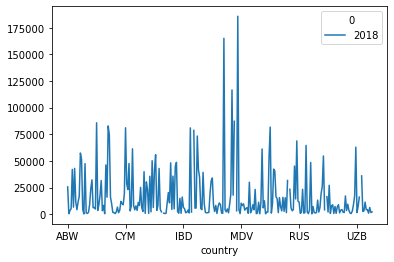

In [19]:
gdp_percap_2018.plot(x='country');

Save to csv to use for Tableau visuals

In [20]:
#gdp_percap_2018.to_csv('../data/gdp_percap_2018.csv')

Other Way to fill NANs - Separate Dataframe for 2018 nan values

In [21]:
gdp_2018na = gdp_percap.loc[(gdp_percap['2018'].isnull())] 

In [22]:
gdp_2018na.head()

,country_name,country,1998,1999,2000,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
83,Gibraltar,GIB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,Not classified,INX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,St. Martin (French part),MAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,"Korea, Dem. People’s Rep.",PRK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224,Sint Maarten (Dutch part),SXM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
gdp_2018na = gdp_2018na.fillna(method='ffill',axis=1)
gdp_2018na = gdp_2018na.replace('GDP per capita (current US$)',np.nan)
gdp_2018na

,country_name,country,1998,1999,2000,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
83,Gibraltar,GIB,GIB,GIB,GIB,GIB,GIB,GIB,GIB,GIB,...,GIB,GIB,GIB,GIB,GIB,GIB,GIB,GIB,GIB,GIB
109,Not classified,INX,INX,INX,INX,INX,INX,INX,INX,INX,...,INX,INX,INX,INX,INX,INX,INX,INX,INX,INX
146,St. Martin (French part),MAF,MAF,MAF,MAF,MAF,MAF,MAF,MAF,MAF,...,MAF,MAF,MAF,MAF,MAF,MAF,MAF,MAF,MAF,MAF
192,"Korea, Dem. People’s Rep.",PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,...,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK
224,Sint Maarten (Dutch part),SXM,SXM,SXM,SXM,SXM,SXM,SXM,SXM,SXM,...,SXM,SXM,SXM,SXM,SXM,SXM,SXM,SXM,SXM,SXM
254,British Virgin Islands,VGB,VGB,VGB,VGB,VGB,VGB,VGB,VGB,VGB,...,VGB,VGB,VGB,VGB,VGB,VGB,VGB,VGB,VGB,VGB


In [24]:
gdp_2018na = gdp_2018na.replace('GDP per capita (current US$)',np.nan)
gdp_2018na.head()

,country_name,country,1998,1999,2000,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
83,Gibraltar,GIB,GIB,GIB,GIB,GIB,GIB,GIB,GIB,GIB,...,GIB,GIB,GIB,GIB,GIB,GIB,GIB,GIB,GIB,GIB
109,Not classified,INX,INX,INX,INX,INX,INX,INX,INX,INX,...,INX,INX,INX,INX,INX,INX,INX,INX,INX,INX
146,St. Martin (French part),MAF,MAF,MAF,MAF,MAF,MAF,MAF,MAF,MAF,...,MAF,MAF,MAF,MAF,MAF,MAF,MAF,MAF,MAF,MAF
192,"Korea, Dem. People’s Rep.",PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,...,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK,PRK
224,Sint Maarten (Dutch part),SXM,SXM,SXM,SXM,SXM,SXM,SXM,SXM,SXM,...,SXM,SXM,SXM,SXM,SXM,SXM,SXM,SXM,SXM,SXM


In [25]:
#gdp_2018na['2018'].astype(int)

## Bring in NYC race data to merge

In [26]:
clean_nyc = pd.read_csv('../data/clean_nyc.csv')

In [27]:
clean_nyc = clean_nyc.reset_index()

In [28]:
clean_nyc.head()

,index,Unnamed: 0,id,full_name,year,age,dob,gender,city,country,...,iaaf,place,time,pace,gender_place,age_grade_time,age_grade_place,age_grade_percent,nyrr_races,age_group
0,0,0,16619869,Stanley Biwott,2015,29,1986-04-21,M,Eldoret,KEN,...,KEN,1,0 days 02:10:34.000000000,04:59,1,10:34,2,94.18,2,20-29
1,1,1,16654079,Geoffery Kamworor,2015,22,1992-11-22,M,Kapchorwa District,KEN,...,KEN,2,0 days 02:10:48.000000000,05:00,2,10:48,3,94.00,4,20-29
2,2,2,16611443,Lelisa Desisa,2015,25,1990-01-14,M,Addis Ababa,ETH,...,ETH,3,0 days 02:12:10.000000000,05:03,3,12:10,4,93.03,5,20-29
3,3,3,16616462,Wilson Kipsang,2015,33,1982-03-15,M,Iten,KEN,...,KEN,4,0 days 02:12:45.000000000,05:04,4,12:36,5,92.73,5,30-39
4,4,4,16654080,Yemane Tsegay,2015,30,1985-04-08,M,Addis Ababa,ETH,...,ETH,5,0 days 02:13:24.000000000,05:06,5,13:24,6,92.18,1,30-39


## Merge Race & GDP Data

In [29]:
race_and_gdp = pd.merge(clean_nyc, gdp_percap_2018, on = 'country')

In [30]:
race_and_gdp.head()

,index,Unnamed: 0,id,full_name,year,age,dob,gender,city,country,...,time,pace,gender_place,age_grade_time,age_grade_place,age_grade_percent,nyrr_races,age_group,country_name,2018
0,0,0,16619869,Stanley Biwott,2015,29,1986-04-21,M,Eldoret,KEN,...,0 days 02:10:34.000000000,04:59,1,10:34,2,94.18,2,20-29,Kenya,1710.510097
1,1,1,16654079,Geoffery Kamworor,2015,22,1992-11-22,M,Kapchorwa District,KEN,...,0 days 02:10:48.000000000,05:00,2,10:48,3,94.00,4,20-29,Kenya,1710.510097
2,3,3,16616462,Wilson Kipsang,2015,33,1982-03-15,M,Iten,KEN,...,0 days 02:12:45.000000000,05:04,4,12:36,5,92.73,5,30-39,Kenya,1710.510097
3,18,18,16614353,Mary Keitany,2015,33,1982-01-18,F,Iten,KEN,...,0 days 02:24:25.000000000,05:31,1,24:03,2,94.01,11,30-39,Kenya,1710.510097
4,26,26,16624460,Priscah Jeptoo,2015,31,1984-06-26,F,Nandi,KEN,...,0 days 02:27:03.000000000,05:37,6,27:01,7,92.11,2,30-39,Kenya,1710.510097


In [31]:
#SCATTER PLOT TO DO
#1. group by country and average pace per country
#2. scatter or line graph with y = avg. pace per mile & x = gdp per capita (for subset of countries?)
#display gdp per capita for 2018 per country
#country x-axis, dual y axis

## GDP and Finish Time correlation?

In [32]:
#time and pace are objects - need to convert in order to aggregate
race_and_gdp['time'] = pd.to_timedelta(race_and_gdp['time']).astype('int64')
race_gdp_plot = race_and_gdp.groupby(['year','country','2018']).time.mean().astype('timedelta64[ns]').to_frame()
race_gdp_plot

time
year country 2018                        
2015 AND     42029.762740        03:19:38
     ARE     43004.953360        03:20:12
     ARG     11683.949620 03:36:18.280000
     AUS     57395.919470 03:31:20.072727
     AUT     51499.885360 03:27:22.913793
...                                   ...
2019 VEN     16054.490510 03:32:08.416666
     VNM     2566.596950         02:59:15
     VUT     3123.893396         03:32:24
     ZAF     6374.028196  03:20:35.480000
     ZWE     2146.996385         03:08:28

[447 rows x 1 columns]

In [33]:
race_gdp_plot = race_gdp_plot.loc[(2018)]
race_gdp_plot.columns

Index(['time'], dtype='object')

In [34]:
race_gdp_plot = race_gdp_plot.reset_index()

In [35]:
race_gdp_plot.columns = ['country','gdp','time']

In [36]:
seconds = race_gdp_plot.time.dt.total_seconds()

In [37]:
race_gdp_plot['seconds'] = seconds

In [38]:
race_gdp_plot.describe()

,gdp,time,seconds
count,92.000000,92,92.000000
mean,29666.003366,0 days 03:24:32.765029,12272.765029
std,33849.799381,0 days 00:13:20.169726,800.169727
min,475.721250,0 days 02:11:55.750000,7915.750000
25%,6341.172796,0 days 03:22:06.916666,12126.916667
50%,16102.631635,0 days 03:25:08,12308.000000
75%,43812.302707,0 days 03:29:42.998432,12582.998432
max,185741.280000,0 days 03:47:25,13645.000000


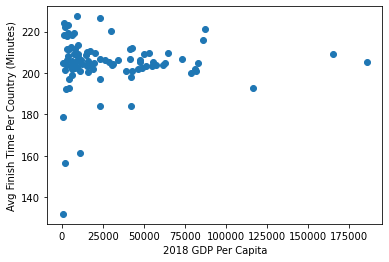

In [39]:
#try scatter plot to see if there is a relationship - none present and correlation coefficient is less than .05
plt.scatter(x=race_gdp_plot.gdp,y=seconds/60)
plt.xlabel('2018 GDP Per Capita')
plt.ylabel('Avg Finish Time Per Country (Minutes)')
plt.show()

In [40]:
race_gdp_plot.corr()

,gdp,seconds
gdp,1.000000,0.048928
seconds,0.048928,1.000000


## GDP and Pace per mile Correlation?

In [41]:
race_and_gdp['pace'] = '00:' + race_and_gdp['pace']
race_and_gdp['pace'] = pd.to_timedelta(race_and_gdp['pace'])
race_and_gdp['pace'] = pd.to_timedelta(race_and_gdp['pace']).astype('int64')
race_gdp_pace_plot = race_and_gdp.groupby(['year','country','2018']).pace.mean().astype('timedelta64[ns]').to_frame()
race_gdp_pace_plot

pace
year country 2018                        
2015 AND     42029.762740        00:07:37
     ARE     43004.953360        00:07:39
     ARG     11683.949620 00:08:15.540000
     AUS     57395.919470 00:08:04.104545
     AUT     51499.885360        00:07:55
...                                   ...
2019 VEN     16054.490510 00:08:05.916666
     VNM     2566.596950         00:06:51
     VUT     3123.893396         00:08:07
     ZAF     6374.028196  00:07:39.560000
     ZWE     2146.996385         00:07:12

[447 rows x 1 columns]

In [42]:
race_gdp_pace_plot = race_gdp_pace_plot.loc[(2018)]
race_gdp_pace_plot = race_gdp_pace_plot.reset_index()

In [43]:
race_gdp_pace_plot.columns = ['country','gdp_2018','pace']

In [44]:
pace_sec = race_gdp_pace_plot.pace.dt.total_seconds()

In [45]:
race_gdp_pace_plot['pace_sec'] = pace_sec

In [46]:
race_gdp_pace_plot.head(5)

,country,gdp_2018,pace,pace_sec
0,AND,42029.76274,00:07:01,421.000000
1,ARE,43004.95336,00:08:06.200000,486.200000
2,ARG,11683.94962,00:07:52.116666,472.116667
3,AUS,57395.91947,00:07:47.307291,467.307292
4,AUT,51499.88536,00:07:46.282051,466.282051


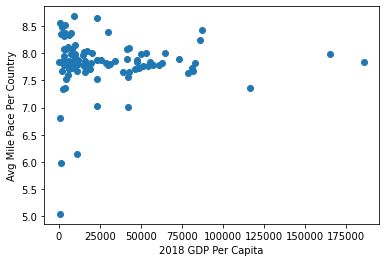

In [47]:
plt.scatter(x=race_gdp_pace_plot.gdp_2018,y=race_gdp_pace_plot.pace_sec/60)
plt.xlabel('2018 GDP Per Capita')
plt.ylabel('Avg Mile Pace Per Country')
plt.show()

## Merge Race & Weather Data

In [48]:
race_and_weather = pd.merge(clean_nyc, nyc_weather, on = 'year')
race_and_weather.head()

,index,Unnamed: 0,id,full_name,year,age,dob,gender,city,country,...,SPD,SPD.1,DIR,sky_coverage,WX,SPD.2,hum%_start,hum%_2hrs,hum%_4hrs,avg_hum%
0,0,0,16619869,Stanley Biwott,2015,29,1986-04-21,M,Eldoret,KEN,...,5,16,240,5,23,240,64,65,60,63
1,1,1,16654079,Geoffery Kamworor,2015,22,1992-11-22,M,Kapchorwa District,KEN,...,5,16,240,5,23,240,64,65,60,63
2,2,2,16611443,Lelisa Desisa,2015,25,1990-01-14,M,Addis Ababa,ETH,...,5,16,240,5,23,240,64,65,60,63
3,3,3,16616462,Wilson Kipsang,2015,33,1982-03-15,M,Iten,KEN,...,5,16,240,5,23,240,64,65,60,63
4,4,4,16654080,Yemane Tsegay,2015,30,1985-04-08,M,Addis Ababa,ETH,...,5,16,240,5,23,240,64,65,60,63


In [49]:
race_and_weather = race_and_weather[['year','age','time','pace','age_group','gender','city','country','max_temp',
                                     'min_temp','avg_temp','precip','sky_coverage',
                                     'hum%_start','hum%_2hrs','hum%_4hrs','avg_hum%']]

In [50]:
race_and_weather.head()

,year,age,time,pace,age_group,gender,city,country,max_temp,min_temp,avg_temp,precip,sky_coverage,hum%_start,hum%_2hrs,hum%_4hrs,avg_hum%
0,2015,29,0 days 02:10:34.000000000,04:59,20-29,M,Eldoret,KEN,65,54,60,0.0,5,64,65,60,63
1,2015,22,0 days 02:10:48.000000000,05:00,20-29,M,Kapchorwa District,KEN,65,54,60,0.0,5,64,65,60,63
2,2015,25,0 days 02:12:10.000000000,05:03,20-29,M,Addis Ababa,ETH,65,54,60,0.0,5,64,65,60,63
3,2015,33,0 days 02:12:45.000000000,05:04,30-39,M,Iten,KEN,65,54,60,0.0,5,64,65,60,63
4,2015,30,0 days 02:13:24.000000000,05:06,30-39,M,Addis Ababa,ETH,65,54,60,0.0,5,64,65,60,63


In [51]:
#GRAPH TO DO
#1. group by year - avg pace or avg time (possibly do a chart for each year separately)
#compare to weather data in plot

In [52]:
race_and_weather['pace'] = '00:' + race_and_weather['pace']
race_and_weather['pace'] = pd.to_timedelta(race_and_weather['pace']).astype('int64')

In [53]:
race_weather_plot = race_and_weather.groupby(['year','max_temp','min_temp','avg_temp',
                                              'precip','hum%_start','hum%_2hrs',
                                              'hum%_4hrs','avg_hum%']).pace.mean().astype('timedelta64[ns]').to_frame()
race_weather_plot

,,,,,,,,,pace
year,max_temp,min_temp,avg_temp,precip,hum%_start,hum%_2hrs,hum%_4hrs,avg_hum%,
2015,65,54,60,0.00,64,65,60,63,00:08:02.869100
2016,59,45,52,0.00,45,39,39,41,00:07:58.513600
2017,61,51,56,0.02,81,90,93,88,00:07:54.026000
2018,55,43,49,0.00,46,40,34,40,00:07:48.962500
2019,54,42,48,0.00,52,44,41,46,00:07:40.593500


In [54]:
race_weather_plot = race_weather_plot.reset_index()

In [55]:
pace_seconds = race_weather_plot.pace.dt.total_seconds()

In [56]:
race_weather_plot['pace_sec'] = pace_seconds

No handles with labels found to put in legend.


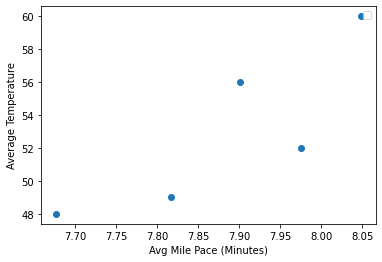

In [61]:
plt.scatter(y=race_weather_plot.avg_temp,x=race_weather_plot.pace_sec/60)
plt.ylabel('Average Temperature')
plt.xlabel('Avg Mile Pace (Minutes)')
plt.legend()
plt.show();

No handles with labels found to put in legend.


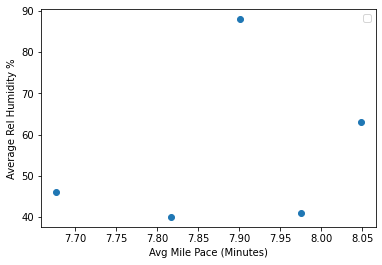

In [59]:
plt.scatter(y=race_weather_plot['avg_hum%'],x=race_weather_plot.pace_sec/60)
plt.ylabel('Average Rel Humidity %')
plt.xlabel('Avg Mile Pace (Minutes)')
plt.legend()
plt.show();

In [62]:
race_weather_plot.corr()

,year,max_temp,min_temp,avg_temp,precip,hum%_start,hum%_2hrs,hum%_4hrs,avg_hum%,pace_sec
year,1.000000,-0.914677,-0.783929,-0.853815,0.000000,-0.240683,-0.295492,-0.280549,-0.272211,-0.989296
max_temp,-0.914677,1.000000,0.965249,0.990112,0.273635,0.587549,0.622708,0.593099,0.600847,0.897013
min_temp,-0.783929,0.965249,1.000000,0.991601,0.426401,0.750927,0.775772,0.733757,0.752742,0.773758
avg_temp,-0.853815,0.990112,0.991601,1.000000,0.335410,0.668449,0.697403,0.658159,0.673888,0.837473
precip,0.000000,0.273635,0.426401,0.335410,1.000000,0.865741,0.876548,0.913461,0.890917,0.066787
hum%_start,-0.240683,0.587549,0.750927,0.668449,0.865741,1.000000,0.995678,0.986427,0.996338,0.256429
hum%_2hrs,-0.295492,0.622708,0.775772,0.697403,0.876548,0.995678,1.000000,0.992072,0.998417,0.320821
hum%_4hrs,-0.280549,0.593099,0.733757,0.658159,0.913461,0.986427,0.992072,1.000000,0.996494,0.308443
avg_hum%,-0.272211,0.600847,0.752742,0.673888,0.890917,0.996338,0.998417,0.996494,1.000000,0.295614
pace_sec,-0.989296,0.897013,0.773758,0.837473,0.066787,0.256429,0.320821,0.308443,0.295614,1.000000


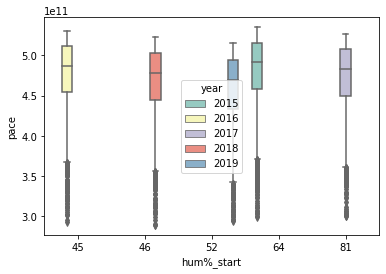

In [63]:
ax = sns.boxplot(y="pace", x="hum%_start", hue="year",
                 data=race_and_weather, palette="Set3")

In [66]:
ax2 = sns.boxplot(x="time", y="hum%_start", hue="year",
                 data=race_and_weather, palette="Set3")

Error in callback <function flush_figures at 0x11e17a950> (for post_execute):


KeyboardInterrupt: 

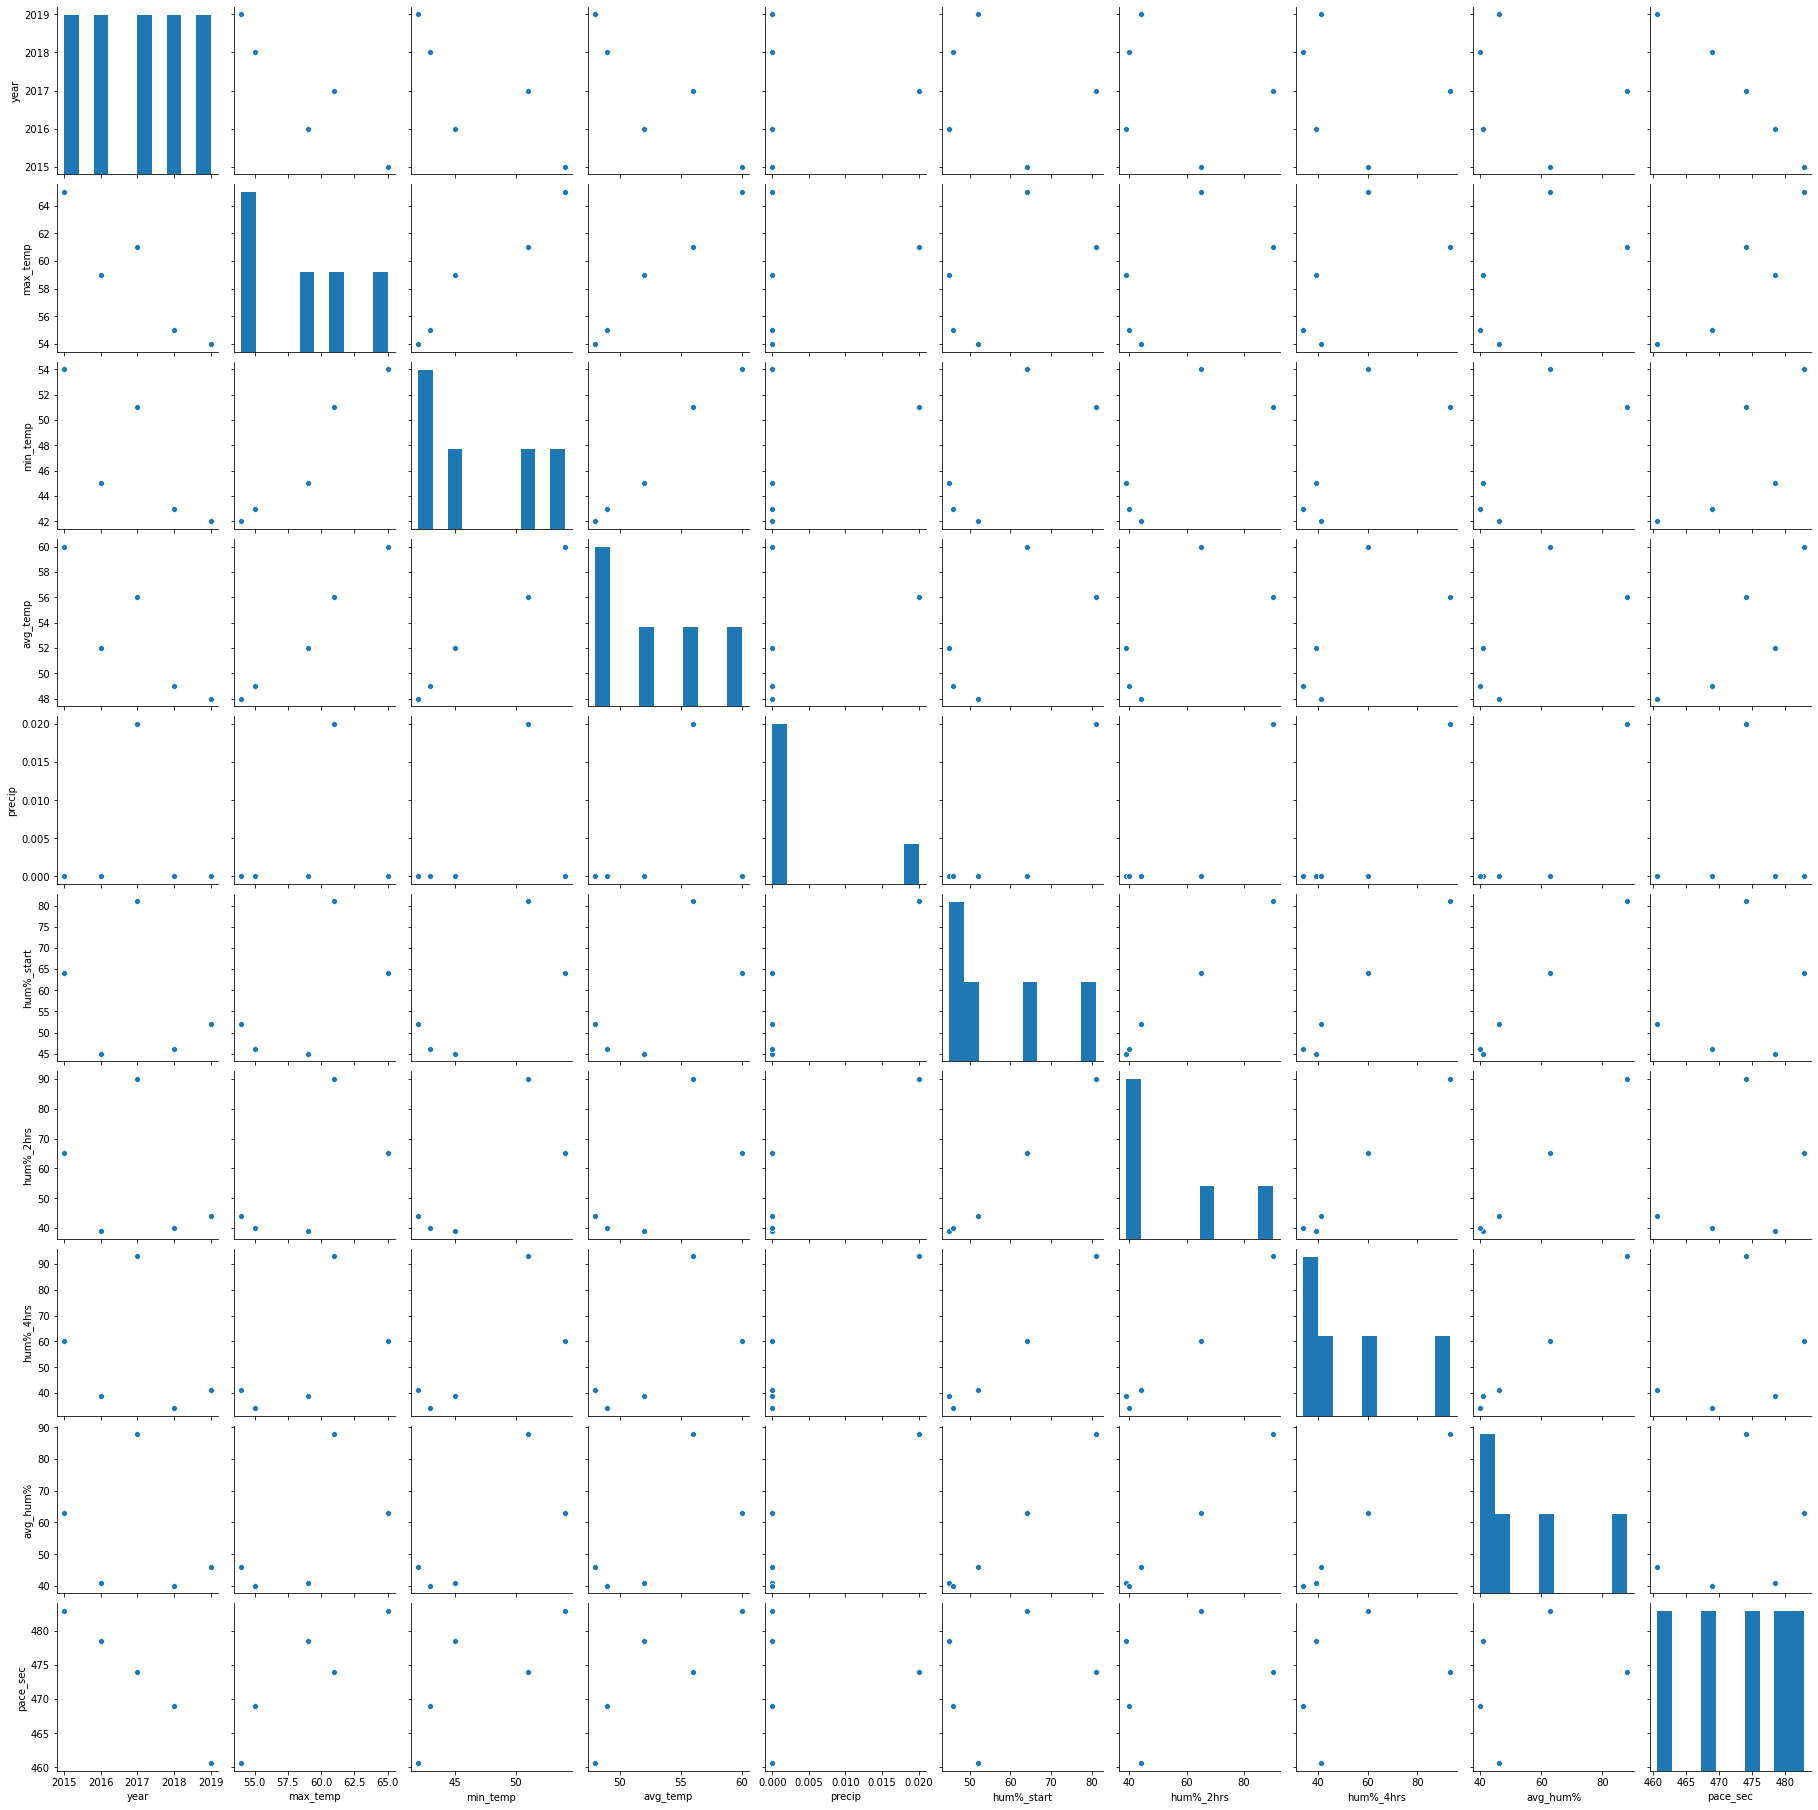

In [65]:
sns.pairplot(race_weather_plot, hue=None, hue_order=None, 
                 palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', 
                 diag_kind='auto', markers=None, height=2.5, aspect=1,
                 plot_kws=None, diag_kws=None, grid_kws=None, size=None);

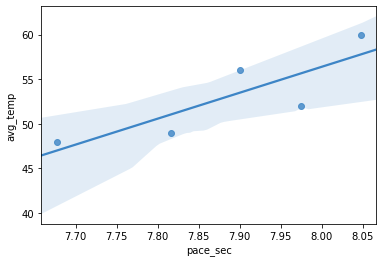

In [81]:
#plot with regression fit
sns.regplot(x=race_weather_plot.pace_sec/60, y=race_weather_plot.avg_temp,
            label ='year',color ='#3d85c6',truncate = False);

# Other GDP Data - Other Exploration

In [ ]:
gdp = pd.read_csv('../data/gdp_clean.csv')

In [ ]:
gdp.head()

In [ ]:
#drop some columns and rename others
gdp = gdp.drop(columns = ['Indicator Code'], axis=1)
gdp = gdp.rename(columns={'Country Name': 'country', 'Country Code':'country_code',
                                          'Indicator Name':'indicator_name',})
                                          

In [ ]:
gdp.describe()

In [ ]:
gdp.info()

In [ ]:
gdp['2018'].sort_values()

In [ ]:
#if 2018 is null GDP value, then return the average of 2015-2017: 

In [ ]:
gdp['2018'] = gdp.apply(
    lambda row: (row['2015']+row['2016']+row['2017']/3) if np.isnan(row['2018']) else row['2018'],
    axis=1
)

In [ ]:
gdp['2017'] = gdp.apply(
    lambda row: (row['2015']+row['2016']+row['2018']/3) if np.isnan(row['2017']) else row['2017'],
    axis=1
)

In [ ]:
gdp['2016'] = gdp.apply(
    lambda row: (row['2015']+row['2017']+row['2018']/3) if np.isnan(row['2016']) else row['2016'],
    axis=1
)

In [ ]:
gdp.info()

In [ ]:
gdp.sort_values('2018', ascending = True).tail(20)